<a href="https://colab.research.google.com/github/Becky1201/Becky1201.github.io/blob/main/%E6%88%90%E7%99%BC%E7%A8%8B%E5%BC%8F_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     |████████████████████████████████| 11.2 MB 9.2 MB/s 
     |████████████████████████████████| 27.7 MB 2.2 MB/s 
     |████████████████████████████████| 898 kB 39.8 MB/s 
     |████████████████████████████████| 91 kB 8.3 MB/s 
     |████████████████████████████████| 2.4 MB 47.0 MB/s 
     |████████████████████████████████| 1.1 MB 41.9 MB/s 
     |████████████████████████████████| 40.1 MB 1.3 MB/s 
     |████████████████████████████████| 94 kB 3.0 MB/s 
     |████████████████████████████████| 144 kB 61.9 MB/s 
     |████████████████████████████████| 271 kB 69.8 MB/s 
     |████████████████████████████████| 47 kB 4.0 MB/s 
     |████████████████████████████████| 63 kB 1.5 MB/s 
     |████████████████████████████████| 6.4 MB 48.2 MB/s 
  Created wheel for pytrends: filename=pytrends-4.8.0-py3-none-any.whl size=16126 sha256=df5477541eb5e2e1aaeadf9452470dfd6e01dbfe3ec5085b971fe361c1c24ff6
  Stored in directory: /root/.cache/pip/wheels/07/6f/5c/8174f98dec1bfbc7d5da4092854afcbcff4b26c3d9b6

2330
[*********************100%***********************]  1 of 1 completed
stockNo : 2330.TW Stocker Initialized. Data covers 2015-01-05 00:00:00 to 2022-03-17 00:00:00.
     |████████████████████████████████| 13.1 MB 943 kB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.1
    Uninstalling matplotlib-3.5.1:
      Successfully uninstalled matplotlib-3.5.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Maximum Adj. Close = 683.00 on 2022-01-17 00:00:00.
Minimum Adj. Close = 115.00 on 2015-08-24 00:00:00.
Current Adj. Close = 579.00 on 2022-03-17 00:00:00.



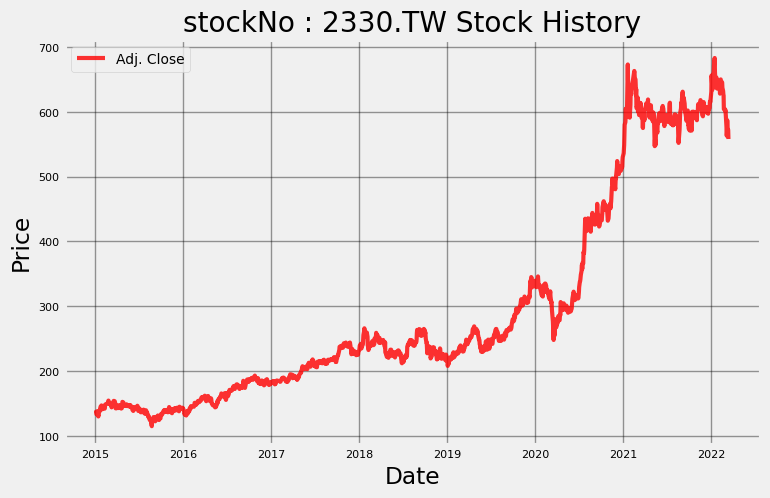

     |████████████████████████████████| 67.3 MB 65 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Predicted Price on 2022-03-27 00:00:00 = $546.73


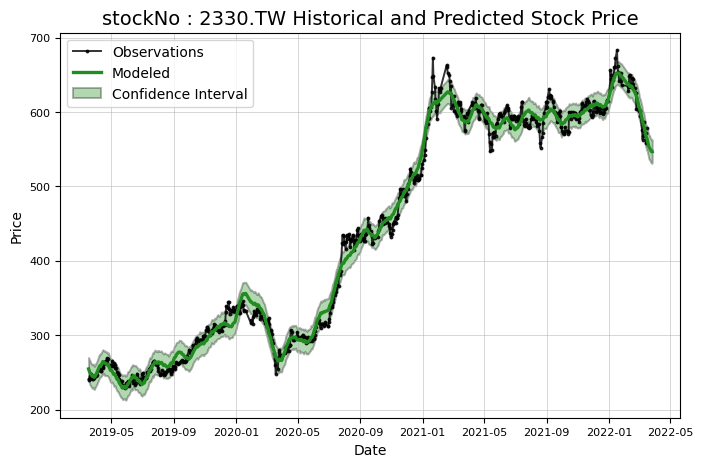


Predicted Increase: 

         Date    estimate    change       upper       lower
11 2022-03-28  542.321714  0.276700  555.643907  529.266217
12 2022-03-29  542.431304  0.109590  555.656265  528.911939
15 2022-04-01  541.388262  0.014009  554.750315  527.374293
17 2022-04-03  543.983299  2.595037  558.613615  531.039112
18 2022-04-04  545.226711  1.243413  559.353719  531.990258
19 2022-04-05  545.706605  0.479893  560.171453  531.732909
20 2022-04-06  545.899330  0.192725  560.343607  531.769488
21 2022-04-07  546.748523  0.849193  561.275882  532.156969
22 2022-04-08  548.706620  1.958097  563.725092  533.700597
24 2022-04-10  553.001301  4.294682  567.826579  537.066992
25 2022-04-11  553.410296  0.408994  570.953667  537.585358
28 2022-04-14  553.260266  0.795301  571.105637  536.876903
29 2022-04-15  554.999931  1.739665  571.421071  538.029987
31 2022-04-17  556.659890  1.659959  575.638706  539.204853
36 2022-04-22  552.400884  0.082372  572.694897  532.188889
53 2022-05-09  53

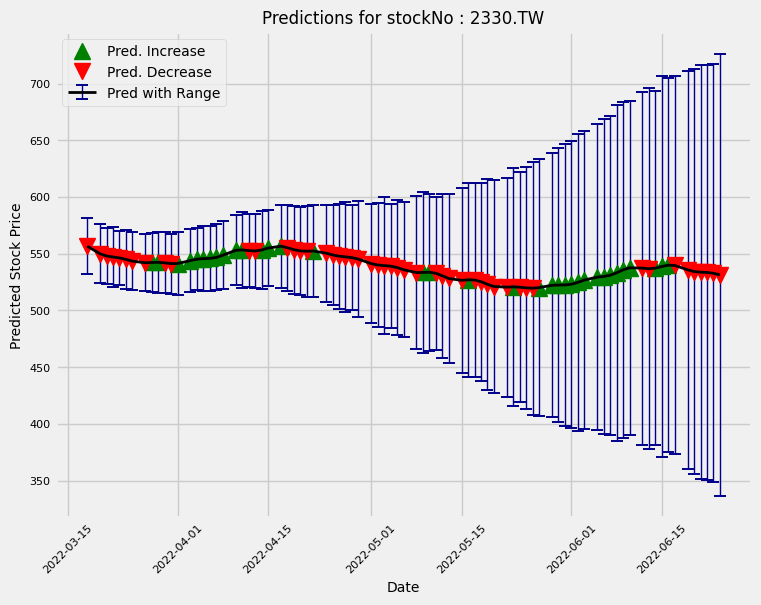

In [ ]:
!pip install -U quandl numpy pandas matplotlib pystan pytrends plotly yfinance
!pip install fbprophet
import quandl
import pandas as pd
import numpy as np
import fbprophet
import pytrends
from pytrends.request import TrendReq

import matplotlib.pyplot as plt

import matplotlib

class Stocker():
    
    def __init__(self, stockNo, dataframe):
        
        
        self.symbol = "stockNo : {}".format(stockNo)
        

        stock = dataframe
        self.test_stock = dataframe.copy()
        
        stock['ds'] = stock['Date']
        stock['Adj. Close'] = stock['Close']
        stock['Adj. Open'] = stock['Open']
        stock['y'] = stock['Adj. Close']
        stock['Daily Change'] = stock['Adj. Close'] - stock['Adj. Open']
        
        self.stock = dataframe.copy()
        self.min_date = min(stock['Date'])
        self.max_date = max(stock['Date'])
        
        self.max_price = np.max(self.stock['y'])
        self.min_price = np.min(self.stock['y'])
        
        self.min_price_date = self.stock[self.stock['y'] == self.min_price]['Date']
        self.min_price_date = self.min_price_date[self.min_price_date.index[0]]
        self.max_price_date = self.stock[self.stock['y'] == self.max_price]['Date']
        self.max_price_date = self.max_price_date[self.max_price_date.index[0]]
        
        self.starting_price = float(self.stock.loc[0, 'Adj. Open'])
        
        self.most_recent_price = float(self.stock.loc[self.stock.index[-1], 'y'])

        self.round_dates = True
        
        self.training_years = 3

        self.changepoint_prior_scale = 0.05 
        self.weekly_seasonality = False
        self.daily_seasonality = False
        self.monthly_seasonality = True
        self.yearly_seasonality = True
        self.changepoints = None
        
        print('{} Stocker Initialized. Data covers {} to {}.'.format(self.symbol,
                                                                     self.min_date,
                                                                     self.max_date))
    
    """
    Make sure start and end dates are in the range and can be
    converted to pandas datetimes. Returns dates in the correct format
    """
    def handle_dates(self, start_date, end_date):
        
        
        if start_date is None:
            start_date = self.min_date
        if end_date is None:
            end_date = self.max_date
        
        try:
            start_date = pd.to_datetime(start_date)
            end_date = pd.to_datetime(end_date)
        
        except Exception as e:
            print('Enter valid pandas date format.')
            print(e)
            return
        
        valid_start = False
        valid_end = False
        
        while (not valid_start) & (not valid_end):
            valid_end = True
            valid_start = True
            
            if end_date < start_date:
                print('End Date must be later than start date.')
                start_date = pd.to_datetime(input('Enter a new start date: '))
                end_date= pd.to_datetime(input('Enter a new end date: '))
                valid_end = False
                valid_start = False
            
            else: 
                if end_date > self.max_date:
                    print('End Date exceeds data range')
                    end_date= pd.to_datetime(input('Enter a new end date: '))
                    valid_end = False

                if start_date < self.min_date:
                    print('Start Date is before date range')
                    start_date = pd.to_datetime(input('Enter a new start date: '))
                    valid_start = False
                
        
        return start_date, end_date
        
    """
    Return the dataframe trimmed to the specified range.
    """
    def make_df(self, start_date, end_date, df=None):
        
        if not df:
            df = self.stock.copy()
        
        
        start_date, end_date = self.handle_dates(start_date, end_date)
        
        start_in = True
        end_in = True

        if self.round_dates:
            if (start_date not in list(df['Date'])):
                start_in = False
            if (end_date not in list(df['Date'])):
                end_in = False

            if (not end_in) & (not start_in):
                trim_df = df[(df['Date'] >= start_date) & 
                             (df['Date'] <= end_date)]
            
            else:
                if (end_in) & (start_in):
                    trim_df = df[(df['Date'] >= start_date) & 
                                 (df['Date'] <= end_date)]
                else:
                    # If only start is missing, round start
                    if (not start_in):
                        trim_df = df[(df['Date'] > start_date) & 
                                     (df['Date'] <= end_date)]
                    # If only end is imssing round end
                    elif (not end_in):
                        trim_df = df[(df['Date'] >= start_date) & 
                                     (df['Date'] < end_date)]

        
        else:
            valid_start = False
            valid_end = False
            while (not valid_start) & (not valid_end):
                start_date, end_date = self.handle_dates(start_date, end_date)
                
                # No round dates, if either data not in, print message and return
                if (start_date in list(df['Date'])):
                    valid_start = True
                if (end_date in list(df['Date'])):
                    valid_end = True
                    
                # Check to make sure dates are in the data
                if (start_date not in list(df['Date'])):
                    print('Start Date not in data (either out of range or not a trading day.)')
                    start_date = pd.to_datetime(input(prompt='Enter a new start date: '))
                    
                elif (end_date not in list(df['Date'])):
                    print('End Date not in data (either out of range or not a trading day.)')
                    end_date = pd.to_datetime(input(prompt='Enter a new end date: ') )

            # Dates are not rounded
            trim_df = df[(df['Date'] >= start_date) & 
                         (df['Date'] <= end_date.date)]

        
            
        return trim_df


    # Basic Historical Plots and Basic Statistics
    def plot_stock(self, start_date=None, end_date=None, stats=['Adj. Close'], plot_type='basic'):
        
        self.reset_plot()
        
        if start_date is None:
            start_date = self.min_date
        if end_date is None:
            end_date = self.max_date
        
        stock_plot = self.make_df(start_date, end_date)

        colors = ['r', 'b', 'g', 'y', 'c', 'm']
        
        for i, stat in enumerate(stats):
            
            stat_min = min(stock_plot[stat])
            stat_max = max(stock_plot[stat])

            stat_avg = np.mean(stock_plot[stat])
            
            date_stat_min = stock_plot[stock_plot[stat] == stat_min]['Date']
            date_stat_min = date_stat_min[date_stat_min.index[0]]
            date_stat_max = stock_plot[stock_plot[stat] == stat_max]['Date']
            date_stat_max = date_stat_max[date_stat_max.index[0]]
            
            print('Maximum {} = {:.2f} on {}.'.format(stat, stat_max, date_stat_max))
            print('Minimum {} = {:.2f} on {}.'.format(stat, stat_min, date_stat_min))
            print('Current {} = {:.2f} on {}.\n'.format(stat, self.stock.loc[self.stock.index[-1], stat], self.max_date))
            
            # Percentage y-axis
            if plot_type == 'pct':
                # Simple Plot 
                plt.style.use('fivethirtyeight');
                if stat == 'Daily Change':
                    plt.plot(stock_plot['Date'], 100 * stock_plot[stat],
                         color = colors[i], linewidth = 2.4, alpha = 0.9,
                         label = stat)
                else:
                    plt.plot(stock_plot['Date'], 100 * (stock_plot[stat] -  stat_avg) / stat_avg,
                         color = colors[i], linewidth = 2.4, alpha = 0.9,
                         label = stat)

                plt.xlabel('Date'); plt.ylabel('Change Relative to Average (%)'); plt.title('%s Stock History' % self.symbol); 
                plt.legend(prop={'size':10})
                plt.grid(color = 'k', alpha = 0.4); 

            # Stat y-axis
            elif plot_type == 'basic':
                plt.style.use('fivethirtyeight');
                plt.plot(stock_plot['Date'], stock_plot[stat], color = colors[i], linewidth = 3, label = stat, alpha = 0.8)
                plt.xlabel('Date'); plt.ylabel('Price'); plt.title('%s Stock History' % self.symbol); 
                plt.legend(prop={'size':10})
                plt.grid(color = 'k', alpha = 0.4); 
      
        plt.show();
        
    # Reset the plotting parameters to clear style formatting
    # Not sure if this should be a static method
    @staticmethod
    def reset_plot():
        
        # Restore default parameters
        matplotlib.rcdefaults()
        
        # Adjust a few parameters to liking
        matplotlib.rcParams['figure.figsize'] = (8, 5)
        matplotlib.rcParams['axes.labelsize'] = 10
        matplotlib.rcParams['xtick.labelsize'] = 8
        matplotlib.rcParams['ytick.labelsize'] = 8
        matplotlib.rcParams['axes.titlesize'] = 14
        matplotlib.rcParams['text.color'] = 'k'
    
    # Method to linearly interpolate prices on the weekends
    def resample(self, dataframe):
        # Change the index and resample at daily level
        dataframe = dataframe.set_index('ds')
        dataframe = dataframe.resample('D')
        
        # Reset the index and interpolate nan values
        dataframe = dataframe.reset_index(level=0)
        dataframe = dataframe.interpolate()
        return dataframe
    
    # Remove weekends from a dataframe
    def remove_weekends(self, dataframe):
        
        # Reset index to use ix
        dataframe = dataframe.reset_index(drop=True)
        
        weekends = []
        
        # Find all of the weekends
        for i, date in enumerate(dataframe['ds']):
            if (date.weekday()) == 5 | (date.weekday() == 6):
                weekends.append(i)
            
        # Drop the weekends
        dataframe = dataframe.drop(weekends, axis=0)
        
        return dataframe
    
    
    # Calculate and plot profit from buying and holding shares for specified date range
    def buy_and_hold(self, start_date=None, end_date=None, nshares=1):
        self.reset_plot()
        
        start_date, end_date = self.handle_dates(start_date, end_date)
            
        # Find starting and ending price of stock
        start_price = float(self.stock[self.stock['Date'] == start_date]['Adj. Open'])
        end_price = float(self.stock[self.stock['Date'] == end_date]['Adj. Close'])
        
        # Make a profit dataframe and calculate profit column
        profits = self.make_df(start_date, end_date)
        profits['hold_profit'] = nshares * (profits['Adj. Close'] - start_price)
        
        # Total profit
        total_hold_profit = nshares * (end_price - start_price)
        
        print('{} Total buy and hold profit from {} to {} for {} shares = ${:.2f}'.format
              (self.symbol, start_date, end_date, nshares, total_hold_profit))
        
        # Plot the total profits 
        plt.style.use('dark_background')
        
        # Location for number of profit
        text_location = (end_date - pd.DateOffset(months = 1))
        
        # Plot the profits over time
        plt.plot(profits['Date'], profits['hold_profit'], 'b', linewidth = 3)
        plt.ylabel('Profit ($)'); plt.xlabel('Date'); plt.title('Buy and Hold Profits for {} {} to {}'.format(
                                                                self.symbol, start_date, end_date))
        
        # Display final value on graph
        plt.text(x = text_location, 
             y =  total_hold_profit + (total_hold_profit / 40),
             s = '$%d' % total_hold_profit,
            color = 'g' if total_hold_profit > 0 else 'r',
            size = 14)
        
        plt.grid(alpha=0.2)
        plt.show();
        
    # Create a prophet model without training
    def create_model(self):

        # Make the model
        model = fbprophet.Prophet(daily_seasonality=self.daily_seasonality,  
                                  weekly_seasonality=self.weekly_seasonality, 
                                  yearly_seasonality=self.yearly_seasonality,
                                  changepoint_prior_scale=self.changepoint_prior_scale,
                                  changepoints=self.changepoints)
        
        if self.monthly_seasonality:
            # Add monthly seasonality
            model.add_seasonality(name = 'monthly', period = 30.5, fourier_order = 5)
        
        return model
    
    # Graph the effects of altering the changepoint prior scale (cps)
    def changepoint_prior_analysis(self, changepoint_priors=[0.001, 0.05, 0.1, 0.2], colors=['b', 'r', 'grey', 'gold']):
    
        # Training and plotting with specified years of data
        train = self.stock[(self.stock['Date'] > (max(self.stock['Date']) - pd.DateOffset(years=self.training_years)))]
        
        # Iterate through all the changepoints and make models
        for i, prior in enumerate(changepoint_priors):
            # Select the changepoint
            self.changepoint_prior_scale = prior
            
            # Create and train a model with the specified cps
            model = self.create_model()
            model.fit(train)
            future = model.make_future_dataframe(periods=180, freq='D')
            
            # Make a dataframe to hold predictions
            if i == 0:
                predictions = future.copy()
                
            future = model.predict(future)
            
            # Fill in prediction dataframe
            predictions['%.3f_yhat_upper' % prior] = future['yhat_upper']
            predictions['%.3f_yhat_lower' % prior] = future['yhat_lower']
            predictions['%.3f_yhat' % prior] = future['yhat']
         
        # Remove the weekends
        predictions = self.remove_weekends(predictions)
        
        # Plot set-up
        self.reset_plot()
        plt.style.use('fivethirtyeight')
        fig, ax = plt.subplots(1, 1)
        
        # Actual observations
        ax.plot(train['ds'], train['y'], 'ko', ms = 4, label = 'Observations')
        color_dict = {prior: color for prior, color in zip(changepoint_priors, colors)}

        # Plot each of the changepoint predictions
        for prior in changepoint_priors:
            # Plot the predictions themselves
            ax.plot(predictions['ds'], predictions['%.3f_yhat' % prior], linewidth = 1.2,
                     color = color_dict[prior], label = '%.3f prior scale' % prior)
            
            # Plot the uncertainty interval
            ax.fill_between(predictions['ds'].dt.to_pydatetime(), predictions['%.3f_yhat_upper' % prior],
                            predictions['%.3f_yhat_lower' % prior], facecolor = color_dict[prior],
                            alpha = 0.3, edgecolor = 'k', linewidth = 0.6)
                            
        # Plot labels
        plt.legend(loc = 2, prop={'size': 10})
        plt.xlabel('Date'); plt.ylabel('Stock Price'); plt.title('Effect of Changepoint Prior Scale');
        plt.show()
            
    # Basic prophet model for specified number of days  
    def create_prophet_model(self, days=0, resample=False):
        
        self.reset_plot()
        
        model = self.create_model()
        
        # Fit on the stock history for self.training_years number of years
        stock_history = self.stock[self.stock['Date'] > (self.max_date - pd.DateOffset(years = self.training_years))]
        
        if resample:
            stock_history = self.resample(stock_history)
        
        model.fit(stock_history)
        
        # Make and predict for next year with future dataframe
        future = model.make_future_dataframe(periods = days, freq='D')
        future = model.predict(future)
        
        if days > 0:
            # Print the predicted price
            print('Predicted Price on {} = ${:.2f}'.format(
                future.loc[future.index[-1], 'ds'], future.loc[future.index[-1], 'yhat']))

            title = '%s Historical and Predicted Stock Price'  % self.symbol
        else:
            title = '%s Historical and Modeled Stock Price' % self.symbol
        
        # Set up the plot
        fig, ax = plt.subplots(1, 1)

        # Plot the actual values
        ax.plot(stock_history['ds'], stock_history['y'], 'ko-', linewidth = 1.4, alpha = 0.8, ms = 1.8, label = 'Observations')
        
        # Plot the predicted values
        ax.plot(future['ds'], future['yhat'], 'forestgreen',linewidth = 2.4, label = 'Modeled');

        # Plot the uncertainty interval as ribbon
        ax.fill_between(future['ds'].dt.to_pydatetime(), future['yhat_upper'], future['yhat_lower'], alpha = 0.3, 
                       facecolor = 'g', edgecolor = 'k', linewidth = 1.4, label = 'Confidence Interval')

        # Plot formatting
        plt.legend(loc = 2, prop={'size': 10}); plt.xlabel('Date'); plt.ylabel('Price');
        plt.grid(linewidth=0.6, alpha = 0.6)
        plt.title(title);
        plt.show()
        
        return model, future
      
    # Evaluate prediction model for one year
    def evaluate_prediction(self, start_date=None, end_date=None, nshares = None):
        
        # Default start date is one year before end of data
        # Default end date is end date of data
        if start_date is None:
            start_date = self.max_date - pd.DateOffset(years=1)
        if end_date is None:
            end_date = self.max_date
            
        start_date, end_date = self.handle_dates(start_date, end_date)
        
        # Training data starts self.training_years years before start date and goes up to start date
        train = self.stock[(self.stock['Date'] < start_date) & 
                           (self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years)))]
        
        # Testing data is specified in the range
        test = self.stock[(self.stock['Date'] >= start_date) & (self.stock['Date'] <= end_date)]
        
        # Create and train the model
        model = self.create_model()
        model.fit(train)
        
        # Make a future dataframe and predictions
        future = model.make_future_dataframe(periods = 365, freq='D')
        future = model.predict(future)
        
        # Merge predictions with the known values
        test = pd.merge(test, future, on = 'ds', how = 'inner')

        train = pd.merge(train, future, on = 'ds', how = 'inner')
        
        # Calculate the differences between consecutive measurements
        test['pred_diff'] = test['yhat'].diff()
        test['real_diff'] = test['y'].diff()

        # Correct is when we predicted the correct direction
        test['correct'] = (np.sign(test['pred_diff'][1:]) == np.sign(test['real_diff'][1:])) * 1
        
        # Accuracy when we predict increase and decrease
        increase_accuracy = 100 * np.mean(test[test['pred_diff'] > 0]['correct'])
        decrease_accuracy = 100 * np.mean(test[test['pred_diff'] < 0]['correct'])

        # Calculate mean absolute error
        test_errors = abs(test['y'] - test['yhat'])
        test_mean_error = np.mean(test_errors)

        train_errors = abs(train['y'] - train['yhat'])
        train_mean_error = np.mean(train_errors)

        # Calculate percentage of time actual value within prediction range
        test['in_range'] = False

        for i in test.index:
            if (test.loc[i, 'y'] < test.loc[i, 'yhat_upper']) & (test.loc[i, 'y'] > test.loc[i, 'yhat_lower']):
                test.loc[i, 'in_range'] = True

        in_range_accuracy = 100 * np.mean(test['in_range'])

        if not nshares:

            # Date range of predictions
            print('\nPrediction Range: {} to {}.'.format(start_date,
                end_date))

            # Final prediction vs actual value
            print('\nPredicted price on {} = ${:.2f}.'.format(max(future['ds']), future.loc[future.index[-1], 'yhat']))
            print('Actual price on    {} = ${:.2f}.\n'.format(max(test['ds']), test.loc[test.index[-1], 'y']))

            print('Average Absolute Error on Training Data = ${:.2f}.'.format(train_mean_error))
            print('Average Absolute Error on Testing  Data = ${:.2f}.\n'.format(test_mean_error))

            # Direction accuracy
            print('When the model predicted an increase, the price increased {:.2f}% of the time.'.format(increase_accuracy))
            print('When the model predicted a  decrease, the price decreased  {:.2f}% of the time.\n'.format(decrease_accuracy))

            print('The actual value was within the {:d}% confidence interval {:.2f}% of the time.'.format(int(100 * model.interval_width), in_range_accuracy))


             # Reset the plot
            self.reset_plot()
            
            # Set up the plot
            fig, ax = plt.subplots(1, 1)

            # Plot the actual values
            ax.plot(train['ds'], train['y'], 'ko-', linewidth = 1.4, alpha = 0.8, ms = 1.8, label = 'Observations')
            ax.plot(test['ds'], test['y'], 'ko-', linewidth = 1.4, alpha = 0.8, ms = 1.8, label = 'Observations')
            
            # Plot the predicted values
            ax.plot(future['ds'], future['yhat'], 'navy', linewidth = 2.4, label = 'Predicted');

            # Plot the uncertainty interval as ribbon
            ax.fill_between(future['ds'].dt.to_pydatetime(), future['yhat_upper'], future['yhat_lower'], alpha = 0.6, 
                           facecolor = 'gold', edgecolor = 'k', linewidth = 1.4, label = 'Confidence Interval')

            # Put a vertical line at the start of predictions
            plt.vlines(x=min(test['ds']), ymin=min(future['yhat_lower']), ymax=max(future['yhat_upper']), colors = 'r',
                       linestyles='dashed', label = 'Prediction Start')

            # Plot formatting
            plt.legend(loc = 2, prop={'size': 8}); plt.xlabel('Date'); plt.ylabel('Price');
            plt.grid(linewidth=0.6, alpha = 0.6)
                       
            plt.title('{} Model Evaluation from {} to {}.'.format(self.symbol,
                start_date, end_date));
            plt.show();

        
        # If a number of shares is specified, play the game
        elif nshares:
            
            # Only playing the stocks when we predict the stock will increase
            test_pred_increase = test[test['pred_diff'] > 0]
            
            test_pred_increase.reset_index(inplace=True)
            prediction_profit = []
            
            # Iterate through all the predictions and calculate profit from playing
            for i, correct in enumerate(test_pred_increase['correct']):
                
                # If we predicted up and the price goes up, we gain the difference
                if correct == 1:
                    prediction_profit.append(nshares * test_pred_increase.loc[i, 'real_diff'])
                # If we predicted up and the price goes down, we lose the difference
                else:
                    prediction_profit.append(nshares * test_pred_increase.loc[i, 'real_diff'])
            
            test_pred_increase['pred_profit'] = prediction_profit
            
            # Put the profit into the test dataframe
            test = pd.merge(test, test_pred_increase[['ds', 'pred_profit']], on = 'ds', how = 'left')
            test.loc[0, 'pred_profit'] = 0
        
            # Profit for either method at all dates
            test['pred_profit'] = test['pred_profit'].cumsum().ffill()
            test['hold_profit'] = nshares * (test['y'] - float(test.loc[0, 'y']))
            
            # Display information
            print('You played the stock market in {} from {} to {} with {} shares.\n'.format(
                self.symbol, start_date, end_date, nshares))
            
            print('When the model predicted an increase, the price increased {:.2f}% of the time.'.format(increase_accuracy))
            print('When the model predicted a  decrease, the price decreased  {:.2f}% of the time.\n'.format(decrease_accuracy))

            # Display some friendly information about the perils of playing the stock market
            print('The total profit using the Prophet model = ${:.2f}.'.format(np.sum(prediction_profit)))
            print('The Buy and Hold strategy profit =         ${:.2f}.'.format(float(test.loc[test.index[-1], 'hold_profit'])))
            print('\nThanks for playing the stock market!\n')
            
           
            
            # Plot the predicted and actual profits over time
            self.reset_plot()
            
            # Final profit and final smart used for locating text
            final_profit = test.loc[test.index[-1], 'pred_profit']
            final_smart = test.loc[test.index[-1], 'hold_profit']

            # text location
            last_date = test.loc[test.index[-1], 'ds']
            text_location = (last_date - pd.DateOffset(months = 1))

            plt.style.use('dark_background')

            # Plot smart profits
            plt.plot(test['ds'], test['hold_profit'], 'b',
                     linewidth = 1.8, label = 'Buy and Hold Strategy') 

            # Plot prediction profits
            plt.plot(test['ds'], test['pred_profit'], 
                     color = 'g' if final_profit > 0 else 'r',
                     linewidth = 1.8, label = 'Prediction Strategy')

            # Display final values on graph
            plt.text(x = text_location, 
                     y =  final_profit + (final_profit / 40),
                     s = '$%d' % final_profit,
                    color = 'g' if final_profit > 0 else 'r',
                    size = 18)
            
            plt.text(x = text_location, 
                     y =  final_smart + (final_smart / 40),
                     s = '$%d' % final_smart,
                    color = 'g' if final_smart > 0 else 'r',
                    size = 18);

            # Plot formatting
            plt.ylabel('Profit  (Price)'); plt.xlabel('Date'); 
            plt.title('Predicted versus Buy and Hold Profits');
            plt.legend(loc = 2, prop={'size': 10});
            plt.grid(alpha=0.2); 
            plt.show()
        
    def retrieve_google_trends(self, search, date_range):
        
        # Set up the trend fetching object
        pytrends = TrendReq(hl='en-US', tz=360)
        kw_list = [search]

        try:
        
            # Create the search object
            pytrends.build_payload(kw_list, cat=0, timeframe=date_range[0], geo='', gprop='news')
            
            # Retrieve the interest over time
            trends = pytrends.interest_over_time()

            related_queries = pytrends.related_queries()

        except Exception as e:
            print('\nGoogle Search Trend retrieval failed.')
            print(e)
            return
        
        return trends, related_queries
        
    def changepoint_date_analysis(self, search=None):
        self.reset_plot()

        model = self.create_model()
        
        # Use past self.training_years years of data
        train = self.stock[self.stock['Date'] > (self.max_date - pd.DateOffset(years = self.training_years))]
        model.fit(train)
        
        # Predictions of the training data (no future periods)
        future = model.make_future_dataframe(periods=0, freq='D')
        future = model.predict(future)
    
        train = pd.merge(train, future[['ds', 'yhat']], on = 'ds', how = 'inner')
        
        changepoints = model.changepoints
        train = train.reset_index(drop=True)
        
        # Create dataframe of only changepoints
        change_indices = []
        for changepoint in (changepoints):
            change_indices.append(train[train['ds'] == changepoint].index[0])
        
        c_data = train.loc[change_indices, :]
        deltas = model.params['delta'][0]
        
        c_data['delta'] = deltas
        c_data['abs_delta'] = abs(c_data['delta'])
        
        # Sort the values by maximum change
        c_data = c_data.sort_values(by='abs_delta', ascending=False)

        # Limit to 10 largest changepoints
        c_data = c_data[:10]

        # Separate into negative and positive changepoints
        cpos_data = c_data[c_data['delta'] > 0]
        cneg_data = c_data[c_data['delta'] < 0]

        # Changepoints and data
        if not search:
        
            print('\nChangepoints sorted by slope rate of change (2nd derivative):\n')
            print(c_data.loc[:, ['Date', 'Adj. Close', 'delta']][:5])

            # Line plot showing actual values, estimated values, and changepoints
            self.reset_plot()
            
            # Set up line plot 
            plt.plot(train['ds'], train['y'], 'ko', ms = 4, label = 'Stock Price')
            plt.plot(future['ds'], future['yhat'], color = 'navy', linewidth = 2.0, label = 'Modeled')
            
            # Changepoints as vertical lines
            plt.vlines(cpos_data['ds'].dt.to_pydatetime(), ymin = min(train['y']), ymax = max(train['y']), 
                       linestyles='dashed', color = 'r', 
                       linewidth= 1.2, label='Negative Changepoints')

            plt.vlines(cneg_data['ds'].dt.to_pydatetime(), ymin = min(train['y']), ymax = max(train['y']), 
                       linestyles='dashed', color = 'darkgreen', 
                       linewidth= 1.2, label='Positive Changepoints')

            plt.legend(prop={'size':10});
            plt.xlabel('Date'); plt.ylabel('Price'); plt.title('Stock Price with Changepoints')
            plt.show()
        
        # Search for search term in google news
        # Show related queries, rising related queries
        # Graph changepoints, search frequency, stock price
        if search:
            date_range = ['%s %s' % (str(min(train['Date'])), str(max(train['Date'])))]

            # Get the Google Trends for specified terms and join to training dataframe
            trends, related_queries = self.retrieve_google_trends(search, date_range)

            if (trends is None)  or (related_queries is None):
                print('No search trends found for %s' % search)
                return

            print('\n Top Related Queries: \n')
            print(related_queries[search]['top'].head())

            print('\n Rising Related Queries: \n')
            print(related_queries[search]['rising'].head())

            # Upsample the data for joining with training data
            trends = trends.resample('D')

            trends = trends.reset_index(level=0)
            trends = trends.rename(columns={'date': 'ds', search: 'freq'})

            # Interpolate the frequency
            trends['freq'] = trends['freq'].interpolate()

            # Merge with the training data
            train = pd.merge(train, trends, on = 'ds', how = 'inner')

            # Normalize values
            train['y_norm'] = train['y'] / max(train['y'])
            train['freq_norm'] = train['freq'] / max(train['freq'])
            
            self.reset_plot()

            # Plot the normalized stock price and normalize search frequency
            plt.plot(train['ds'], train['y_norm'], 'k-', label = 'Stock Price')
            plt.plot(train['ds'], train['freq_norm'], color='goldenrod', label = 'Search Frequency')

            # Changepoints as vertical lines
            plt.vlines(cpos_data['ds'].dt.to_pydatetime(), ymin = 0, ymax = 1, 
                       linestyles='dashed', color = 'r', 
                       linewidth= 1.2, label='Negative Changepoints')

            plt.vlines(cneg_data['ds'].dt.to_pydatetime(), ymin = 0, ymax = 1, 
                       linestyles='dashed', color = 'darkgreen', 
                       linewidth= 1.2, label='Positive Changepoints')

            # Plot formatting
            plt.legend(prop={'size': 10})
            plt.xlabel('Date'); plt.ylabel('Normalized Values'); plt.title('%s Stock Price and Search Frequency for %s' % (self.symbol, search))
            plt.show()
        
    # Predict the future price for a given range of days
    def predict_future(self, days=30):
        
        # Use past self.training_years years for training
        train = self.stock[self.stock['Date'] > (max(self.stock['Date']) - pd.DateOffset(years=self.training_years))]
        
        model = self.create_model()
        
        model.fit(train)
        
        # Future dataframe with specified number of days to predict
        future = model.make_future_dataframe(periods=days, freq='D')
        future = model.predict(future)
        
        # Only concerned with future dates
        future = future[future['ds'] >= max(self.stock['Date'])]
        
        # Remove the weekends
        future = self.remove_weekends(future)
        
        # Calculate whether increase or not
        future['diff'] = future['yhat'].diff()
    
        future = future.dropna()

        # Find the prediction direction and create separate dataframes
        future['direction'] = (future['diff'] > 0) * 1
        
        # Rename the columns for presentation
        future = future.rename(columns={'ds': 'Date', 'yhat': 'estimate', 'diff': 'change', 
                                        'yhat_upper': 'upper', 'yhat_lower': 'lower'})
        
        future_increase = future[future['direction'] == 1]
        future_decrease = future[future['direction'] == 0]
        
        # Print out the dates
        print('\nPredicted Increase: \n')
        print(future_increase[['Date', 'estimate', 'change', 'upper', 'lower']])
        
        print('\nPredicted Decrease: \n')
        print(future_decrease[['Date', 'estimate', 'change', 'upper', 'lower']])
        
        self.reset_plot()
        
        # Set up plot
        plt.style.use('fivethirtyeight')
        matplotlib.rcParams['axes.labelsize'] = 10
        matplotlib.rcParams['xtick.labelsize'] = 8
        matplotlib.rcParams['ytick.labelsize'] = 8
        matplotlib.rcParams['axes.titlesize'] = 12
        
        # Plot the predictions and indicate if increase or decrease
        fig, ax = plt.subplots(1, 1, figsize=(8, 6))

        # Plot the estimates
        ax.plot(future_increase['Date'], future_increase['estimate'], 'g^', ms = 12, label = 'Pred. Increase')
        ax.plot(future_decrease['Date'], future_decrease['estimate'], 'rv', ms = 12, label = 'Pred. Decrease')

        # Plot errorbars
        ax.errorbar(future['Date'].dt.to_pydatetime(), future['estimate'], 
                    yerr = future['upper'] - future['lower'], 
                    capthick=1.4, color = 'k',linewidth = 2,
                   ecolor='darkblue', capsize = 4, elinewidth = 1, label = 'Pred with Range')

        # Plot formatting
        plt.legend(loc = 2, prop={'size': 10});
        plt.xticks(rotation = '45')
        plt.ylabel('Predicted Stock Price');
        plt.xlabel('Date'); plt.title('Predictions for %s' % self.symbol);
        plt.show()
        
    def changepoint_prior_validation(self, start_date=None, end_date=None,changepoint_priors = [0.001, 0.05, 0.1, 0.2]):


        # Default start date is two years before end of data
        # Default end date is one year before end of data
        if start_date is None:
            start_date = self.max_date - pd.DateOffset(years=2)
        if end_date is None:
            end_date = self.max_date - pd.DateOffset(years=1)
            
        # Convert to pandas datetime for indexing dataframe
        start_date = pd.to_datetime(start_date)
        end_date = pd.to_datetime(end_date)
        
        start_date, end_date = self.handle_dates(start_date, end_date)
                               
        # Select self.training_years number of years
        train = self.stock[(self.stock['Date'] > (start_date - pd.DateOffset(years=self.training_years))) & 
        (self.stock['Date'] < start_date)]
        
        # Testing data is specified by range
        test = self.stock[(self.stock['Date'] >= start_date) & (self.stock['Date'] <= end_date)]

        eval_days = (max(test['Date']) - min(test['Date'])).days
        
        results = pd.DataFrame(0, index = list(range(len(changepoint_priors))), 
            columns = ['cps', 'train_err', 'train_range', 'test_err', 'test_range'])

        print('\nValidation Range {} to {}.\n'.format(min(test['Date']),
            max(test['Date'])))
            
        
        # Iterate through all the changepoints and make models
        for i, prior in enumerate(changepoint_priors):
            results.loc[i, 'cps'] = prior
            
            # Select the changepoint
            self.changepoint_prior_scale = prior
            
            # Create and train a model with the specified cps
            model = self.create_model()
            model.fit(train)
            future = model.make_future_dataframe(periods=eval_days, freq='D')
                
            future = model.predict(future)
            
            # Training results and metrics
            train_results = pd.merge(train, future[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], on = 'ds', how = 'inner')
            avg_train_error = np.mean(abs(train_results['y'] - train_results['yhat']))
            avg_train_uncertainty = np.mean(abs(train_results['yhat_upper'] - train_results['yhat_lower']))
            
            results.loc[i, 'train_err'] = avg_train_error
            results.loc[i, 'train_range'] = avg_train_uncertainty
            
            # Testing results and metrics
            test_results = pd.merge(test, future[['ds', 'yhat', 'yhat_upper', 'yhat_lower']], on = 'ds', how = 'inner')
            avg_test_error = np.mean(abs(test_results['y'] - test_results['yhat']))
            avg_test_uncertainty = np.mean(abs(test_results['yhat_upper'] - test_results['yhat_lower']))
            
            results.loc[i, 'test_err'] = avg_test_error
            results.loc[i, 'test_range'] = avg_test_uncertainty

        print(results)


        
        # Plot of training and testing average errors
        self.reset_plot()
        
        plt.plot(results['cps'], results['train_err'], 'bo-', ms = 8, label = 'Train Error')
        plt.plot(results['cps'], results['test_err'], 'r*-', ms = 8, label = 'Test Error')
        plt.xlabel('Changepoint Prior Scale'); plt.ylabel('Avg. Absolute Error ($)');
        plt.title('Training and Testing Curves as Function of CPS')
        plt.grid(color='k', alpha=0.3)
        plt.xticks(results['cps'], results['cps'])
        plt.legend(prop={'size':10})
        plt.show();
        
        # Plot of training and testing average uncertainty
        self.reset_plot()

        plt.plot(results['cps'], results['train_range'], 'bo-', ms = 8, label = 'Train Range')
        plt.plot(results['cps'], results['test_range'], 'r*-', ms = 8, label = 'Test Range')
        plt.xlabel('Changepoint Prior Scale'); plt.ylabel('Avg. Uncertainty ($)');
        plt.title('Uncertainty in Estimate as Function of CPS')
        plt.grid(color='k', alpha=0.3)
        plt.xticks(results['cps'], results['cps'])
        plt.legend(prop={'size':10})
        plt.show();
import pandas as pd
import yfinance as yf
x=input()
stockNo = x+".TW"
start_date = '2015-01-01'
df = yf.download(stockNo, start=start_date)
df = df.reset_index()
df
stock = Stocker(stockNo, df)
!pip install matplotlib==3.1.3
stock.plot_stock()
!pip install pystan==2.19.1.1
model, model_data = stock.create_prophet_model(days=10)
#stock.evaluate_prediction()
#stock.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])
stock.changepoint_prior_scale = 0.5
#stock.evaluate_prediction()
stock.predict_future(days=100)